# DBSCAN Lab
In this notebook, we will use DBSCAN to cluster a couple of datasests. We will examine how changing its parameters (epsilon and min_samples) changes the resulting cluster structure.

In [1]:
import dbscan_lab_helper as helper
import pandas as pd
df        = pd.read_csv('blobs.csv')
#
print(df.describe())
print("-------------------------")
print(df.head())

                 0            1
count  1000.000000  1000.000000
mean      3.193580     0.141613
std       6.087923     7.921802
min      -7.694830   -12.488005
25%      -4.728154    -9.111104
50%       6.719740     0.741593
75%       7.731383     8.703260
max      10.444359    12.013756
-------------------------
          0         1
0  8.622185  1.935796
1 -4.736710 -7.970958
2  9.621222  0.925423
3  6.162095 -0.273254
4  8.697488 -1.057452


In [2]:
dataset_1 = df[:80].values
#
print("type(dataset_1) = ", type(dataset_1))
print("dataset_1.shape = ", dataset_1.shape)

type(dataset_1) =  <class 'numpy.ndarray'>
dataset_1.shape =  (80, 2)


This our first dataset. It looks like this:

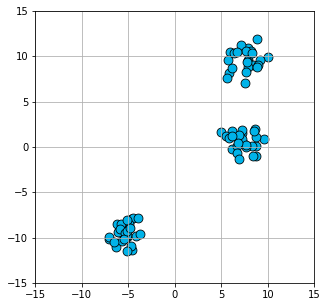

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure( figsize=(5,5))
point_size = 80
point_border = 0.8
plt.scatter( dataset_1[:,0], dataset_1[:,1], s=point_size, color="#00B3E9", edgecolor='black', lw=point_border);
plt.grid(); plt.xlim(-15,15); plt.ylim(-15,15);

Let's cluster it using DBSCAN's default settings and see what happens. We are hoping for it to be able to assign each of the three "blobs" into its own cluster. Can it do that out of the box?

In [4]:
# Import sklearn's cluster module
from sklearn import cluster

#TODO: create an instance of DBSCAN
dbscan = cluster.DBSCAN()

print("type(dbscan) = ", type(dbscan))

type(dbscan) =  <class 'sklearn.cluster.dbscan_.DBSCAN'>


In [5]:
#TODO: use DBSCAN's fit_predict to return clustering labels for dataset_1
clustering_labels_1 = dbscan.fit_predict(dataset_1)

print("type(clustering_labels_1) = ", type(clustering_labels_1))
print("clustering_labels_1.shape = ", clustering_labels_1.shape)
print("clustering_labels_1[:10]  = ", clustering_labels_1[:15])

type(clustering_labels_1) =  <class 'numpy.ndarray'>
clustering_labels_1.shape =  (80,)
clustering_labels_1[:10]  =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1]


### itertools　で便利な変数を用意する

In [6]:
import numpy as np
from itertools import cycle, islice

var_cycle = cycle(['#df8efd', '#78c465', '#ff8e34',
                   '#f65e97', '#a65628', '#984ea3',
                   '#999999', '#e41a1c', '#dede00'])

var_slice = islice( var_cycle, 5) # start=None=0, stop=5

var_list  = list(var_slice)

print("type(var_cycle) = ", type(var_cycle))
print("var_cycle       = ", var_cycle)
print("----------------------------")
print("type(var_slice) = ", type(var_slice))
print("var_slice       = ", var_slice)
print("----------------------------")
print("type(var_list) = ", type(var_list))
print("var_list       = ", var_list)

type(var_cycle) =  <class 'itertools.cycle'>
var_cycle       =  <itertools.cycle object at 0x0000022091EC4438>
----------------------------
type(var_slice) =  <class 'itertools.islice'>
var_slice       =  <itertools.islice object at 0x0000022091EAEA48>
----------------------------
type(var_list) =  <class 'list'>
var_list       =  ['#df8efd', '#78c465', '#ff8e34', '#f65e97', '#a65628']


In [7]:
y_pred  = clustering_labels_1
stop_id = int(max(y_pred) + 1)
colors  = np.array(list(islice(var_cycle, stop_id)))
#
print("y_pred  = ", y_pred)
print("stop_id = ", stop_id)
print("colors  = ", colors)

y_pred  =  [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1  0  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1  0 -1 -1 -1]
stop_id =  1
colors  =  ['#984ea3']


In [8]:
colors = np.append(colors, '#BECBD6')
print("colors  = ", colors)

colors  =  ['#984ea3' '#BECBD6']


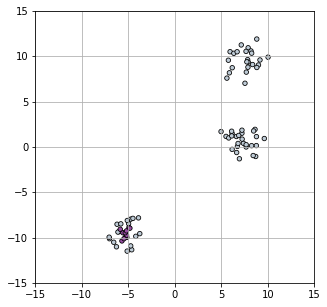

In [12]:
# Plot clustering
plt.figure( figsize=(5,5))
point_size   = 20
point_border = 0.8
plt.scatter( dataset_1[:,0], dataset_1[:,1], s=point_size, color=colors[y_pred], edgecolor='black', lw=point_border);
plt.grid(); plt.xlim(-15,15); plt.ylim(-15,15);

Does that look okay? Was it able to group the dataset into the three clusters we were hoping for?

As you see, we will have to make some tweaks. Let's start by looking at Epsilon, the radius of each point's neighborhood. The default value in sklearn is 0.5.

### 点の周囲に、epsilon = 0.5 の距離の円を描いた（neighborhood=True）

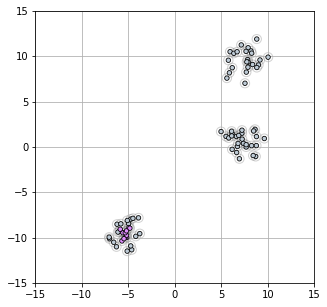

In [10]:
# Plot clustering with neighborhoods
helper.plot_clustered_dataset(dataset_1, clustering_labels_1, neighborhood=True)

From the graph, we can see that an Epsilon value of 0.5 is too small for this dataset. We need to increase it so the points in a blob overlap each others' neighborhoods, but not to the degree where a single cluster would span two blobs.

**Quiz**: Change the value of Epsilon so that each blob is its own cluster (without any noise points). The graph shows  the points in the datasets as well as the neighborhood of each point:

### Epsilon　を　0.5 -> 2　に変更した

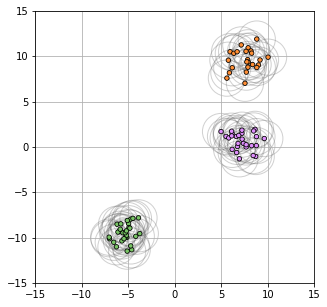

In [13]:
# TODO: increase the value of epsilon to allow DBSCAN to find three clusters in the dataset
epsilon= 2

# Cluster
dbscan              = cluster.DBSCAN(eps=epsilon)
clustering_labels_2 = dbscan.fit_predict(dataset_1)

# Plot
helper.plot_clustered_dataset(dataset_1, clustering_labels_2, neighborhood=True, epsilon=epsilon)

Were you able to do it? As you change the values, you can see that the points cluster into larger clusters and the number of noise points keeps on decreasing. Then at Epsilon values above 1.6 we get the clustering we're after. But once we increase it to above 5, we start to see two blobs joining together into one cluster. So the right Epsilon would be in the range between those values in this scenario.

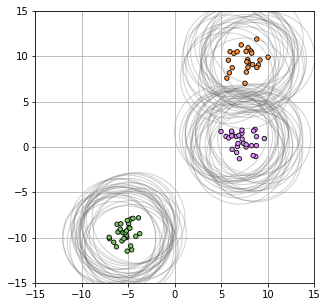

In [21]:
# Plot
helper.plot_clustered_dataset(dataset_1, clustering_labels_2, neighborhood=True, epsilon=5)

## Dataset 2

Let's now look at a dataset that's a little more tricky

In [15]:
dataset_2 = pd.read_csv('varied.csv')[:300].values

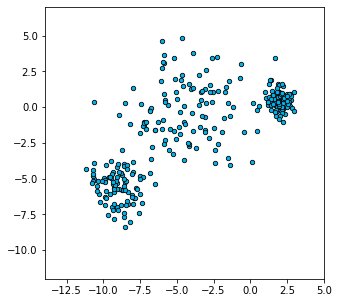

In [16]:
# Plot
helper.plot_dataset(dataset_2, xlim=(-14, 5), ylim=(-12, 7))

What happens if we run DBSCAN with the default parameter values?

In [17]:
# Cluster with DBSCAN
# TODO: Create a new isntance of DBSCAN
dbscan = cluster.DBSCAN()

# TODO: use DBSCAN's fit_predict to return clustering labels for dataset_2
clustering_labels_3 = dbscan.fit_predict(dataset_2)

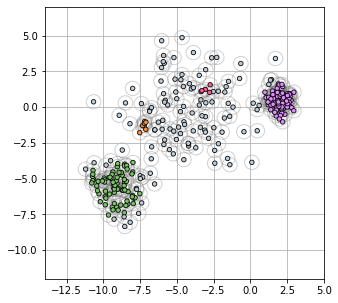

In [18]:
# Plot
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_3, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)

This clustering could make sense in some scenarios, but it seems rather arbitrary. Looking at the dataset, we can imagine at least two scenarios for what we'd want to do:
 * **Scenario** 1: Break the dataset up into three clusters: the blob on the left, the blob on the right, and the central area (even though it's less dense than the blobs on either side).
 * **Scenario 2**: Break the dataset up into two clusters: the blob on the left, and the blob on the right. Marking all the points in the center as noise. 
 
What values for the DBSCAN parameters would allow us to satisfy each of those senarios? Try a number of parameters to see if you can find a clustering that makes more sense.


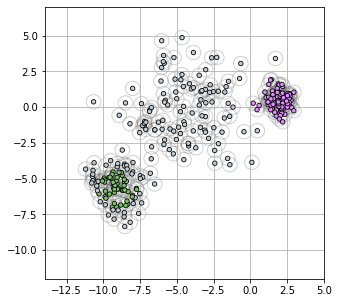

In [19]:
# TODO: Experiment with different values for eps and min_samples to find a suitable clustering for the dataset
eps         = 1.32
min_samples = 50

# Cluster with DBSCAN
dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples)
clustering_labels_4 = dbscan.fit_predict(dataset_2)

# Plot
helper.plot_clustered_dataset(dataset_2, 
                              clustering_labels_4, 
                              xlim=(-14, 5), 
                              ylim=(-12, 7), 
                              neighborhood=True, 
                              epsilon=0.5)


The following grid plots the DBSCAN clustering results of a range of parameter values. Epsilon varies horizontally, while vertically each row shows a different value of min_samples.

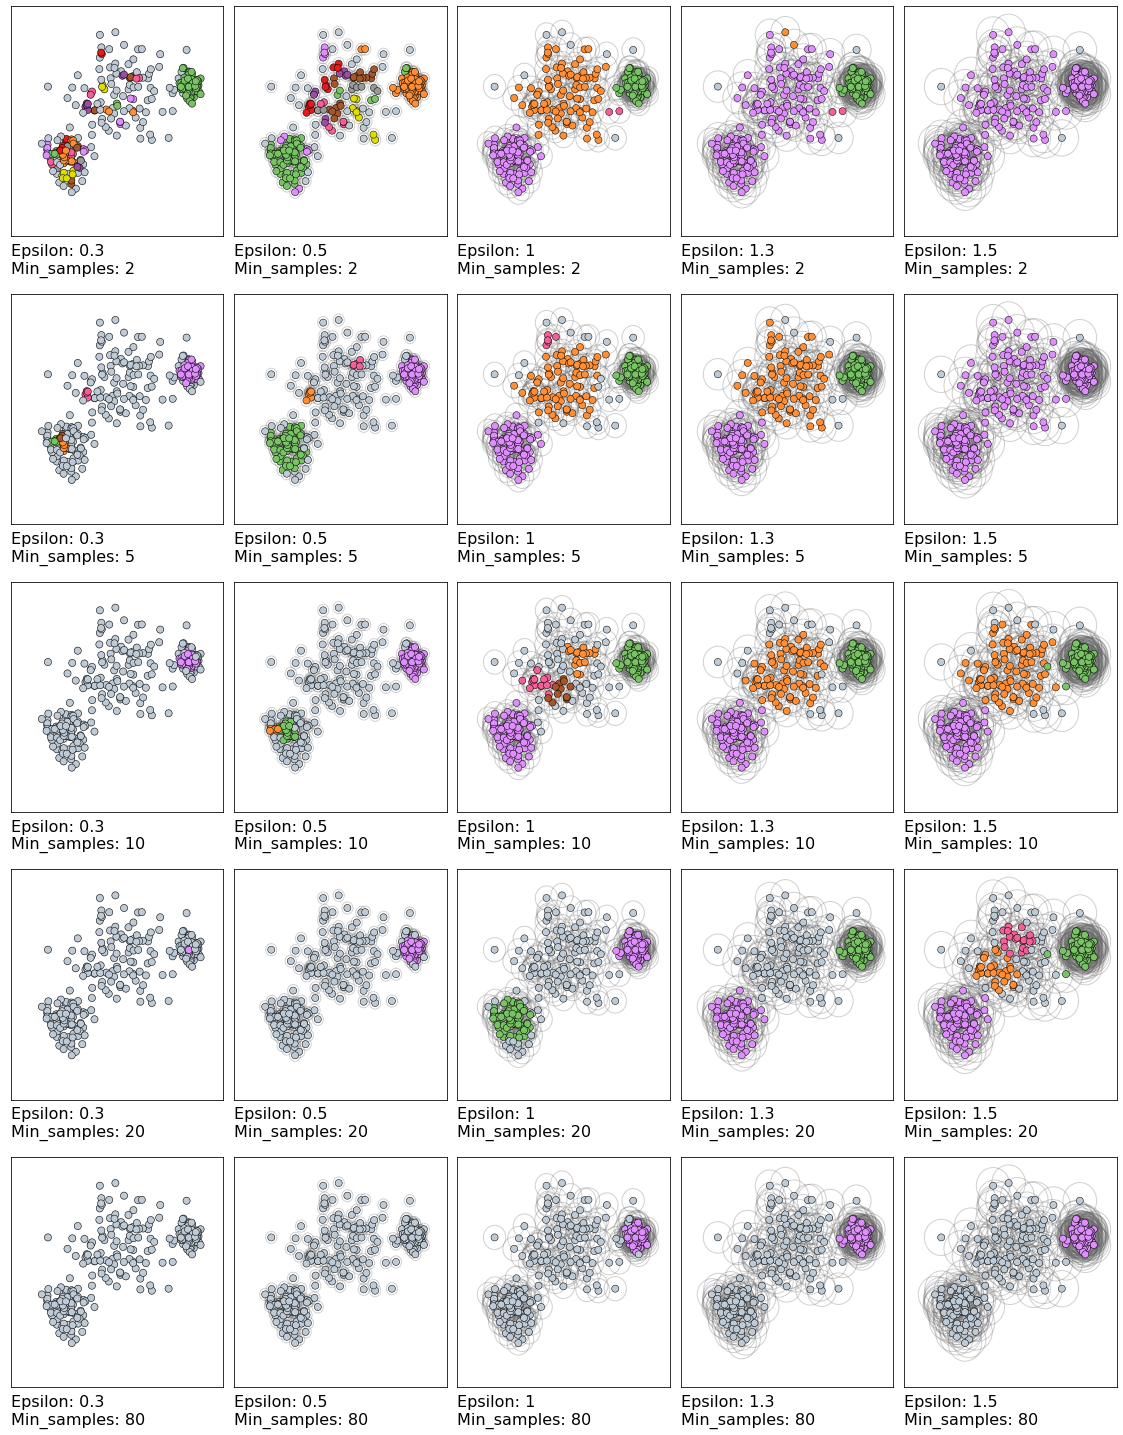

In [20]:
eps_values = [0.3, 0.5, 1, 1.3, 1.5]
min_samples_values = [2, 5, 10, 20, 80]

helper.plot_dbscan_grid(dataset_2, eps_values, min_samples_values)


## Heuristics for experimenting with DBSCAN's parameters
Looking at this grid, we can guess at some general heuristics for tweaking the parameters of DBSCAN:

| |Epsilon too low|Epsilon too high|
|---|---|---|---|
|**min_samples too low** |<img src='images/low_epsilon_and_low_min_sample.png'><br>Many small clusters. More than anticipated for the dataset. <br>**Action**: increase min_samples and epsilon| <img src='images/high_epsilon_and_low_min_sample.png'><br>Most points belong to one cluster<br>**Action**: decrease epsilon and increase min_samples|
|**min_samples too high**|<img src='images/low_epsilon_and_high_min_sample.png'><br>Most/all data points are labeled as noise<br>**Action**: increase epsilon and decrease min_sample| <img src='images/high_epsilon_and_high_min_sample.png'><br> Except for extremely dense regions, most/all data points are <br>labeled as noise. (Or all points are labeled as noise). <br>**Action**: decrease min_samples and epsilon.|

### Quiz
* Which values do you believe best satisfy scenario 1? 
* Which values do you believe best satisfy scenario 2?
